##Importing Necessary Libraries


In [0]:
import seaborn as sns
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import keras
from sklearn.preprocessing import MinMaxScaler
import itertools
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder


In [75]:
df = pd.read_csv('dataset.csv')

# Changine the column header accordingly
df.rename(columns={'Var1':'Raw_Material','Var2':'Date_of_Man','Var3':'Categories','Var4a':'Week_1','Var4b':'Week_2','Var4c':'Week_3',
                         'Var5':'Stor_temp_mean','Var6':'Stor_temp_sd','Var7':'Stor_RH_mean','Var8':'Stor_RH_sd','Var9':'Amb_temp_mean',
                         'Var10': 'Amb_temp_sd','Var11':'Amb_RH_mean','Var12':'Amb_RH_sd','Var13':'Product_Moist','Ex.KLD Dryer':'Target'},inplace=True)
df.head(5)

,Raw_Material,Date_of_Man,Categories,Week_1,Week_2,Week_3,Stor_temp_mean,Stor_temp_sd,Stor_RH_mean,Stor_RH_sd,Amb_temp_mean,Amb_temp_sd,Amb_RH_mean,Amb_RH_sd,Product_Moist,Target
0,BER,03/01/2018,1,1,0,0,79.39,1.29,65.76,1.48,65.48,4.73,61.98,15.40,12.97,14.77
1,BER,03/01/2018,1,1,0,0,79.18,1.40,65.72,1.45,64.94,4.80,61.46,15.64,12.97,14.77
2,BER,03/01/2018,1,1,0,0,78.73,1.45,66.00,1.48,64.13,4.80,60.21,16.14,12.35,14.77
3,BHT,26/02/2018,1,0,0,1,79.63,13.60,66.22,11.26,72.77,5.47,55.55,21.54,12.60,15.43
4,BHT,26/02/2018,1,0,0,1,79.66,13.49,66.23,11.17,72.78,5.45,55.77,21.52,13.42,15.43


### Swap columns

In [76]:
# Changing the dataframe order
df = df[['Date_of_Man','Raw_Material', 'Categories', 'Week_1', 'Week_2', 'Week_3', 'Stor_temp_mean', 'Stor_temp_sd', 'Stor_RH_mean', 'Stor_RH_sd', 'Amb_temp_mean', 'Amb_temp_sd', 'Amb_RH_mean', 'Amb_RH_sd', 'Product_Moist', 'Target']]

# Sorting the dataframe by Date
df['Date_of_Man'] = pd.to_datetime(df.Date_of_Man)
df = df.sort_values(by='Date_of_Man')
df=df.reset_index()
df=df.drop(['index'],axis=1)


df.head(10)

,Date_of_Man,Raw_Material,Categories,Week_1,Week_2,Week_3,Stor_temp_mean,Stor_temp_sd,Stor_RH_mean,Stor_RH_sd,Amb_temp_mean,Amb_temp_sd,Amb_RH_mean,Amb_RH_sd,Product_Moist,Target
0,2015-01-06,WT,1,1,0,0,80.64,0.83,65.83,1.10,72.95,3.14,73.69,11.12,14.05,14.79
1,2015-01-06,CBL,1,1,0,0,81.05,1.00,66.34,1.21,73.62,3.05,74.20,13.43,14.17,14.43
2,2015-01-06,CBL,1,1,0,0,80.97,0.98,66.50,1.14,73.40,3.11,75.83,13.45,13.73,14.43
3,2015-01-06,CBL,1,1,0,0,80.88,0.90,66.39,1.13,73.26,3.19,75.15,14.16,14.03,14.43
4,2015-01-06,BER,1,1,0,0,80.64,0.83,65.83,1.10,72.95,3.14,73.69,11.12,14.32,15.39
5,2015-01-06,CBL,1,1,0,0,80.76,0.87,66.16,1.13,73.40,3.11,72.05,12.84,13.96,14.43
6,2015-01-06,CBL,1,1,0,0,80.64,0.83,65.83,1.10,72.95,3.14,73.69,11.12,14.34,14.43
7,2015-01-07,WT,1,1,0,0,79.34,0.91,66.73,1.48,72.40,3.16,71.71,13.69,13.53,14.50
8,2015-01-07,CBZ,1,1,0,0,79.31,0.97,66.69,1.51,72.15,3.17,72.86,14.11,13.22,15.24
9,2015-01-07,CBZ,1,1,0,0,79.31,0.97,66.69,1.51,72.15,3.17,72.86,14.11,13.61,15.20


## Null value analysis

In [0]:
df.isnull().any()

Date_of_Man       False
Raw_Material      False
Categories        False
Week_1            False
Week_2            False
Week_3            False
Stor_temp_mean    False
Stor_temp_sd      False
Stor_RH_mean      False
Stor_RH_sd        False
Amb_temp_mean     False
Amb_temp_sd       False
Amb_RH_mean       False
Amb_RH_sd         False
Product_Moist     False
Target            False
dtype: bool

In [0]:
df.columns

Index(['Date_of_Man', 'Raw_Material', 'Categories', 'Week_1', 'Week_2',
       'Week_3', 'Stor_temp_mean', 'Stor_temp_sd', 'Stor_RH_mean',
       'Stor_RH_sd', 'Amb_temp_mean', 'Amb_temp_sd', 'Amb_RH_mean',
       'Amb_RH_sd', 'Product_Moist', 'Target'],
      dtype='object')

In [77]:
# model_df for training
model_df=df[['Date_of_Man', 'Raw_Material', 'Categories', 'Week_1', 'Week_2',
       'Week_3', 'Stor_temp_mean', 'Stor_temp_sd', 'Stor_RH_mean',
       'Stor_RH_sd', 'Amb_temp_mean', 'Amb_temp_sd', 'Amb_RH_mean',
       'Amb_RH_sd', 'Product_Moist', 'Target']]

# Label Encoding the Raw_Material
lb_make = LabelEncoder()
model_df["Raw_Material"]=lb_make.fit_transform(model_df["Raw_Material"])

all_df = model_df.copy()
all_df.drop("Date_of_Man",axis=1)

# drop non-value columns
model_df=model_df.drop("Date_of_Man",axis=1)
model_df=model_df.drop("Stor_temp_mean",axis=1)
model_df=model_df.drop("Stor_temp_sd",axis=1)
model_df=model_df.drop("Stor_RH_mean",axis=1)
model_df=model_df.drop("Stor_RH_sd",axis=1)

model_df.head(5)

,Raw_Material,Categories,Week_1,Week_2,Week_3,Amb_temp_mean,Amb_temp_sd,Amb_RH_mean,Amb_RH_sd,Product_Moist,Target
0,31,1,1,0,0,72.95,3.14,73.69,11.12,14.05,14.79
1,3,1,1,0,0,73.62,3.05,74.20,13.43,14.17,14.43
2,3,1,1,0,0,73.40,3.11,75.83,13.45,13.73,14.43
3,3,1,1,0,0,73.26,3.19,75.15,14.16,14.03,14.43
4,0,1,1,0,0,72.95,3.14,73.69,11.12,14.32,15.39


In [78]:
def Normalize(df):
  scaler = MinMaxScaler()
  df['Stor_temp_mean']=scaler.fit_transform(df.Stor_temp_mean.values.reshape(-1,1))
  df['Stor_temp_sd']=scaler.fit_transform(df.Stor_temp_sd.values.reshape(-1,1))
  df['Stor_RH_mean']=scaler.fit_transform(df.Stor_RH_mean.values.reshape(-1,1))
  df['Stor_RH_sd']=scaler.fit_transform(df.Stor_RH_sd.values.reshape(-1,1))
  
  df['Amb_temp_mean']=scaler.fit_transform(df.Amb_temp_mean.values.reshape(-1,1))
  df['Amb_temp_sd']=scaler.fit_transform(df.Amb_temp_sd.values.reshape(-1,1))
  df['Amb_RH_mean']=scaler.fit_transform(df.Amb_RH_mean.values.reshape(-1,1))
  df['Amb_RH_sd']=scaler.fit_transform(df.Amb_RH_sd.values.reshape(-1,1))
  df['Product_Moist']=scaler.fit_transform(df.Product_Moist.values.reshape(-1,1))
  df['Target']=scaler.fit_transform(df.Target.values.reshape(-1,1))
  
  return df

  
# Normalization
# all_df = all_df.drop(['Date_of_Man'], axis=1)
temp_df=all_df.copy()
norm_df=Normalize(temp_df)
norm_df = norm_df.drop(['Date_of_Man'],axis=1)
norm_df.describe()

,Raw_Material,Categories,Week_1,Week_2,Week_3,Stor_temp_mean,Stor_temp_sd,Stor_RH_mean,Stor_RH_sd,Amb_temp_mean,Amb_temp_sd,Amb_RH_mean,Amb_RH_sd,Product_Moist,Target
count,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000
mean,15.152203,0.792716,0.777428,0.120953,0.101619,0.229661,0.083912,0.706793,0.157372,0.493473,0.189700,0.597525,0.540263,0.671306,0.474338
std,11.245167,0.405406,0.416020,0.326110,0.302180,0.084295,0.124283,0.057109,0.203529,0.189701,0.077584,0.195600,0.181084,0.086021,0.163109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1.000000,1.000000,0.000000,0.000000,0.180620,0.008969,0.671981,0.031250,0.363218,0.139078,0.451856,0.397140,0.614853,0.354054
50%,13.500000,1.000000,1.000000,0.000000,0.000000,0.232469,0.012930,0.706546,0.038936,0.514368,0.176115,0.635854,0.532288,0.668394,0.464865
75%,28.000000,1.000000,1.000000,0.000000,0.000000,0.280918,0.173821,0.735327,0.315839,0.615517,0.229781,0.753151,0.684156,0.725389,0.578378
max,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
norm_df.head()

,Raw_Material,Categories,Week_1,Week_2,Week_3,Stor_temp_mean,Stor_temp_sd,Stor_RH_mean,Stor_RH_sd,Amb_temp_mean,Amb_temp_sd,Amb_RH_mean,Amb_RH_sd,Product_Moist,Target
0,31,1,1,0,0,0.309392,0.005358,0.676072,0.027722,0.659195,0.151172,0.685224,0.340406,0.739206,0.475676
1,3,1,1,0,0,0.326817,0.007338,0.704853,0.030494,0.697701,0.144369,0.694153,0.446956,0.759931,0.378378
2,3,1,1,0,0,0.323417,0.007105,0.713883,0.028730,0.685057,0.148904,0.722689,0.447878,0.683938,0.378378
3,3,1,1,0,0,0.319592,0.006174,0.707675,0.028478,0.677011,0.154951,0.710784,0.480627,0.735751,0.378378
4,0,1,1,0,0,0.309392,0.005358,0.676072,0.027722,0.659195,0.151172,0.685224,0.340406,0.785838,0.637838


In [0]:
def load_data(df,seq_len):
  
  data_raw = df.as_matrix()
  data=[]
  
  for index in range(len(data_raw)- seq_len):
    data.append(data_raw[index:index + seq_len])
    
  data = np.array(data)
  # Splitting for training and testing
  total_length=len(data)
  train_size = total_length * 80 // 100
  #train_size = 3375
  print(data.shape)
  train_X = data[:train_size,:,:-1]
  train_y = data[:train_size,:,-1]
    
  test_X = data[train_size:,:,:-1]
  test_y = data[train_size:,:,-1]
  
  return train_X , train_y , test_X , test_y

In [0]:
# print("Train X shape ",train_X.shape)
# print("Train Y shape ",train_y.shape)
# print("Test X shape ",test_X.shape)
# print("Test Y shape ",test_y.shape)

In [80]:
seq_len = 20
# with original dataframe
train_X,train_y,test_X,test_y = load_data(norm_df,seq_len)
# with normalized dataframe
#train_X,train_y,test_X,test_y = load_data(norm_df,seq_len)
print('Train_X Shape:{}'.format(train_X.shape))
print('Train_Y Shape:{}'.format(train_y.shape))
print('Test_X Shape:{}'.format(test_X.shape))
print('Test_Y Shape:{}'.format(test_y.shape))

(4428, 20, 15)
Train_X Shape:(3542, 20, 14)
Train_Y Shape:(3542, 20)
Test_X Shape:(886, 20, 14)
Test_Y Shape:(886, 20)


In [0]:
# # Splitting for training and testing
# total_length=len(norm_df)
# train_size = total_length * 80 // 100

# values=norm_df.as_matrix()
# train = values[:train_size, :]
# test = values[train_size:, :]


# # split into input and outputs
# train_X, train_y = train[:, :-1], train[:, -1]
# test_X, test_y = test[:, :-1], test[:, -1]


# # reshape input to be 3D [samples, timesteps, features]
# train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
# print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

## Modelling


In [81]:
## Basic Cell RNN in tensorflow

index_in_epoch = 0;
perm_array  = np.arange(train_X.shape[0])
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > train_X.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return train_X[perm_array[start:end]], train_y[perm_array[start:end]]

# parameters
n_steps = seq_len
n_inputs = 14
n_neurons = 200
n_outputs = 20
n_layers = 2
learning_rate = 0.001
batch_size = 40
n_epochs = 20
train_set_size = train_X.shape[0]
test_set_size = test_X.shape[0]

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])
keep_prob = tf.placeholder(tf.float32)

# use Basic RNN Cell
# layer_1 = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)

# layer_1_dropout = tf.contrib.rnn.DropoutWrapper(layer_1,keep_prob)


layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
          for layer in range(n_layers)]

# Adding Dropout
#layers = tf.nn.dropout(layers,0.1)

# layers = [layer_1_dropout , layer_2_dropout ]

#use Basic LSTM Cell 
# layers = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons, activation=tf.nn.elu)
#          for layer in range(n_layers)]

# use LSTM Cell with peephole connections
# #layers = [tf.contrib.rnn.LSTMCell(num_units=n_neurons, 
#                                  activation=tf.nn.leaky_relu, use_peepholes = True)
#          for layer in range(n_layers)]

#layers.append(tf.contrib.rnn.LayerNormBasicLSTMCell( num_units=50))
# use GRU cell
# layers = [tf.contrib.rnn.GRUCell(num_units=n_neurons, activation=tf.nn.leaky_relu)
#           for layer in range(n_layers)]
                                                                     
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.abs(outputs - y)) # loss function = mean squared error 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)
# Add ops to save and restore all the variables.
saver = tf.train.Saver()
                                              
# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: train_X , y: train_y}) 
            mse_valid = loss.eval(feed_dict={X: test_X, y: test_y}) 
            print('%.2f epochs: MAE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: train_X})
    #y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: test_X})
    # Save the variables to disk.
    save_path = saver.save(sess, "model.ckpt")

0.00 epochs: MAE train/valid = 0.854871/0.947104
4.99 epochs: MAE train/valid = 0.121227/0.147304
9.98 epochs: MAE train/valid = 0.114409/0.116472
14.97 epochs: MAE train/valid = 0.117289/0.143190
19.97 epochs: MAE train/valid = 0.092838/0.154585


In [66]:
#y_test_pred = model.predict(test_X)
a=abs(y_test_pred - test_y)
print(sum(a<0.5))

[886 886 886 886 886 883 880 880 878 882 881 886 885 881 882 885 886 886
 886 884]


In [82]:
from sklearn.metrics import mean_absolute_error
# Calculate individual metrics
mean_absolute_error = mean_absolute_error(test_y[:,0], y_test_pred[:,0])
print('Mean Absolute Error :', mean_absolute_error)

Mean Absolute Error : 0.14422727979187347


In [83]:
scaler= MinMaxScaler()
scaler.fit(all_df.Target.reshape(-1,1))
preds_unnorm = scaler.inverse_transform(y_test_pred)
test_y_unnorm = scaler.inverse_transform(test_y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


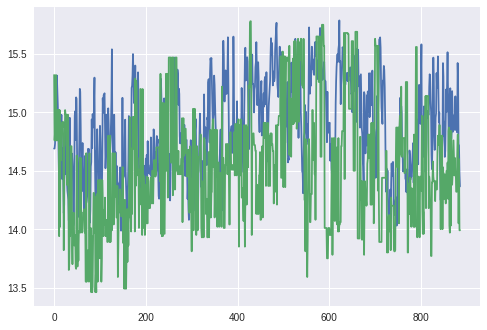

In [84]:
plt.plot(preds_unnorm[:,0])
plt.plot(test_y_unnorm[:,0])

In [0]:
# difference
a=abs(preds_unnorm[:,0] - test_y_unnorm[:,0])

In [86]:
new_list = []
for i in range(20):
  new_list.append(a)
  
  
print(f"Maximum variation: {np.array(new_list).max()}")
print(f"Minimum variation: {np.array(new_list).min()}")

Maximum variation: 1.7520249938964838
Minimum variation: 0.00045177459716860824


In [0]:
df_out=pd.DataFrame()

In [0]:
df_out["Product_Moisture"]= df.loc[3559:,"Product_Moist"]
df_out["Actual_Target"]= df.loc[3559:,"Target"]
df_out = df_out.reset_index()

In [89]:
df_out["Predictions_Target"]=pd.DataFrame(data=preds_unnorm[:,0])
df_out["Absoulte Difference"] = abs(df_out["Actual_Target"]-df_out["Predictions_Target"])
df_out.head(10)

,index,Product_Moisture,Actual_Target,Predictions_Target,Absoulte Difference
0,3559,13.26,14.87,14.689679,0.180321
1,3560,14.01,14.87,14.690556,0.179444
2,3561,13.22,14.92,14.731688,0.188312
3,3562,14.01,14.72,14.976121,0.256121
4,3563,14.43,13.82,15.101134,1.281134
5,3564,14.16,14.70,15.190344,0.490344
6,3565,14.11,14.72,15.315233,0.595233
7,3566,14.26,15.02,15.194384,0.174384
8,3567,14.01,14.98,15.068277,0.088277
9,3568,13.55,14.98,14.911791,0.068209


In [0]:
df_out.to_csv('target.csv')

In [91]:
df_pred_sample= pd.DataFrame()
# df_pred_sample = df_out.loc[(df_out["Product_Moist"]>13.2 & df_out["Product_Moist"]<13.9),"Product_Moist"]
df_pred_sample = df_out[(df_out["Product_Moisture"]>13.2) & (df_out["Product_Moisture"]<13.9)]
df_pred_sample.head(10)

,index,Product_Moisture,Actual_Target,Predictions_Target,Absoulte Difference
0,3559,13.26,14.87,14.689679,0.180321
2,3561,13.22,14.92,14.731688,0.188312
9,3568,13.55,14.98,14.911791,0.068209
14,3573,13.37,14.70,14.772881,0.072881
16,3575,13.38,13.68,14.978575,1.298575
17,3576,13.32,13.94,14.667852,0.727852
18,3577,13.24,13.94,14.427535,0.487535
22,3581,13.33,13.86,14.210729,0.350729
23,3582,13.23,13.70,14.911052,1.211052
27,3586,13.56,13.86,14.487982,0.627982
